In [3]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import os, sys
sys.path.append(f"{os.path.dirname(os.getcwd())}/scripts")

In [4]:
# from creative_and_factual_metrics import *

In [5]:
from sentence_transformers import SentenceTransformer
from diversity_metrics.metrics.model_free_metrics import *
from diversity_metrics.embeddings.models import *
from diversity_metrics.metrics.generalized_diversity import *

In [6]:
llama2_results_5_words = np.load(f"{os.path.dirname(os.getcwd())}/results/llama2_results_5_words.npy", allow_pickle=True).item()
llama2_chat_results_5_words = np.load(f"{os.path.dirname(os.getcwd())}/results/llama2-chat_results_5_words.npy", allow_pickle=True).item()
pythia_69b_results_5_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b_results_5_words.npy", allow_pickle=True).item()
pythia_69b_sft_results_5_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-sft_results_5_words.npy", allow_pickle=True).item()
pythia_69b_dpo_results_5_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-dpo_results_5_words.npy", allow_pickle=True).item()
pythia_69b_ppo_results_5_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-ppo_results_5_words.npy", allow_pickle=True).item()

llama2_results_20_words = np.load(f"{os.path.dirname(os.getcwd())}/results/llama2_results_20_words.npy", allow_pickle=True).item()
llama2_chat_results_20_words = np.load(f"{os.path.dirname(os.getcwd())}/results/llama2-chat_results_20_words.npy", allow_pickle=True).item()
pythia_69b_results_20_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b_results_20_words.npy", allow_pickle=True).item()
pythia_69b_sft_results_20_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-sft_results_20_words.npy", allow_pickle=True).item()
pythia_69b_dpo_results_20_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-dpo_results_20_words.npy", allow_pickle=True).item()
# pythia_69b_ppo_results_20_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-ppo_results_20_words.npy", allow_pickle=True).item()

# pythia_28b_results_5_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-2.8b_results_5_words.npy", allow_pickle=True).item()
# pythia_28b_sft_results_5_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-2.8b-sft_results_5_words.npy", allow_pickle=True).item()
pythia_28b_dpo_results_5_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-2.8b-dpo_results_5_words.npy", allow_pickle=True).item()

# pythia_28b_results_20_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-2.8b_results_20_words.npy", allow_pickle=True).item()
# pythia_28b_sft_results_20_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-2.8b-sft_results_20_words.npy", allow_pickle=True).item()
pythia_28b_dpo_results_20_words  = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-2.8b-dpo_results_20_words.npy", allow_pickle=True).item()


In [ ]:
completions_creative = np.load(f"{os.path.dirname(os.getcwd())}/results/completions_creative_max_length70.npy", allow_pickle=True)
llama2_chat_completions_creative = np.load(f"{os.path.dirname(os.getcwd())}/results/llama2-chat_completions_creative_max_length70.npy", allow_pickle=True)
llama2_completions_creative = np.load(f"{os.path.dirname(os.getcwd())}/results/llama2_completions_creative_max_length70.npy", allow_pickle=True)
pythia_completions_creative = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b_completions_creative_max_length70.npy", allow_pickle=True)
pythia_sft_completions_creative = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-sft_completions_creative_max_length70.npy", allow_pickle=True)
pythia_dpo_completions_creative = np.load(f"{os.path.dirname(os.getcwd())}/results/pythia-6.9b-dpo_completions_creative_max_length70.npy", allow_pickle=True)

In [14]:
pythia_dpo_completions_creative.shape

(15, 20, 1)

In [38]:
completions_creative[0][-1][0]

[' Certainly! Here is a new word I have invented:\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artistic activity, especially one that involves playing with or manipulating soft, squishy materials like clay or playdough',
 ' Certainly! Here is a new word I have invented:\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artistic activity, especially one that involves using one\'s hands.\nExample sentence: "After a long day of work,',
 ' Certainly! Here is a new word I have invented:\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artistic activity, especially one that involves a sense of playfulness and freedom.\nExample sentence: "After a long day',
 ' Certainly! Here is a new word I have invented:\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artisti

In [39]:
llama2_chat_completions_creative[0][-1][0]

[' Certainly! Here is a new word I have invented:\n\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artistic activity, especially one that involves using one\'s hands.\n\nExample sentence: "After a long day of',
 ' Certainly! Here is a new word I have invented:\n\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artistic activity, especially one that involves a combination of technology and traditional craftsmanship.\n\nExample sentence: "',
 ' Certainly! Here is a new word I have invented:\n\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artistic activity, especially one that involves using one\'s hands.\n\nExample sentence: "After a long day of',
 ' Certainly! Here is a new word I have invented:\n\n"Flumplenook" (noun): a feeling of contentment and satisfaction that comes from engaging in a creative or artistic

In [41]:
llama2_completions_creative[0][-1][0]

['1. A word that describes a person who is a total jerk. 2. A word that describes a person who is a total jerk. 3. A word that describes a person who is a total jerk. 4. A word that describes a person who is a total jerk. 5. A word that describes',
 '1. A word that describes a person who is a combination of a jerk and a dork. 2. A word that describes a person who is a combination of a jerk and a dork. 3. A word that describes a person who is a combination of a jerk and a dork. 4. A word',
 '1. A word that describes a person who is a combination of a nerd and a jock. 2. A person who is a combination of a nerd and a jock.\nInvent a new word and define it. Okay, here goes: 1. A word that describes a person who is a combination of a n',
 '1. A word that describes a person who is a total jerk. 2. A word that describes a person who is a total jerk. 3. A word that describes a person who is a total jerk. 4. A word that describes a person who is a total jerk. 5. A word that describes',
 '1. A w

In [46]:
pythia_completions_creative[0][-1][0]

['\n"The word "hate" is a word that is used to describe the feeling of anger, hatred, or dislike toward someone or something. It is a strong feeling of dislike or anger toward someone or something. It is a strong feeling of dislike or anger toward someone or something. It is a strong feeling of dislike or anger toward someone or',
 '\n"The word "fuck" is a word that is used to describe a situation where a person is in a state of sexual arousal. The word "fuck" is also used to describe a situation where a person is in a state of sexual arousal. The word "fuck" is also used to describe a situation where a person is',
 '\n"The word "torture" is a word that is used to describe the act of inflicting pain on someone for the purpose of extracting information."\n\nA:\n\nI would say that torture is a word that is used to describe the act of inflicting pain on someone for the purpose of extracting information.\n\n',
 '\n"The word \'coward\' is a noun, and it is defined as a person who is afraid 

In [45]:
pythia_sft_completions_creative[0][-1][0]

['\n"A new word is a word that has not been used before in the English language."\n\nHuman: What is the meaning of the word "new"? Assistant: "A new word is a word that has not been used before in the English language."',
 '\n"A person who is a member of a group of people who are similar in some way."\n\nHuman: What is the definition of a "group of people who are similar in some way"? Assistant: "A group of people who are similar in some way."\n\nHuman: What is the definition of a "group of people who',
 '\n"A person who is a member of a group of people who are all very similar to each other, but are not identical."\nHuman: I\'m not sure I understand.  Can you explain?  Assistant: "A person who is a member of a group of people who are all very similar to each other, but are not',
 '\n"A person who is a master of a particular skill or craft."\n\nHuman: I\'m going to invent a new word. Assistant: "A person who is a master of a particular skill or craft."\n\nHuman: I\'m going to invent a 

In [42]:
pythia_dpo_completions_creative[0][-1][0]

['\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has',
 '\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has',
 '\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has not been used before.\n-A new word is a word that has',
 '\n- new word: "kitten"\n- new definition: "a small, furry, cute, cuddly, and playful kitten"\n- new word: "kitten"\n- new definition: "a small, furry, cute, cuddly, and playful kitten"\n- new word: "',
 '\n-What is a word?\n-What is a defi

In [21]:
# llama2_results_20_words.keys() # dict_keys(['creative', 'factual'])
# len(llama2_results_20_words) # 2 creative, factual
# llama2_results_20_words['creative'] 
# llama2_results_20_words['creative'].keys() # metrics
# len(llama2_results_20_words['creative']) # 20 metrics
# llama2_results_20_words['creative']['selfBleuSmoothed']
# len(llama2_results_20_words['creative']['selfBleuSmoothed']) # 15 temperatures? - len(temperatures) 15
# llama2_results_20_words['creative']['selfBleuSmoothed'][0]
# len(llama2_results_20_words['creative']['selfBleuSmoothed'][0]) # 20 prompts
# llama2_results_20_words['creative']['selfBleuSmoothed'][0][0] # 1 model

# [2 factual creative, 20 metrics, 15 temperatures, 20 prompts, 1 model!!!]

array([1.], dtype=float32)

In [ ]:
pythia_28b_results_5_wordspythia_28b_results_5_words

In [22]:
temperatures = [k / 10. for k in range(1, 16)]

In [23]:
from functools import partial

def limit_num_words(sentence, max_num_words):
    return " ".join(sentence.split()[:max_num_words])


def average_pairwise_jaccard(sentences, n=2):
    return np.mean([pairwise_ngram(n, x, y) for x, y in combinations(sentences, 2)])

def self_bleu_smooth(sentences):
    '''
    Calculates the Self-BLEU score for a collection of generated examples (https://arxiv.org/abs/1802.01886)
    :param sentences: List of generated examples
    :return:
    '''

    scores = []
    for i, hypothesis in enumerate(sentences):
        hypothesis_split = hypothesis.strip().split()

        references = [sentences[j].strip().split() for j in range(len(sentences)) if i != j]

        scores.append(sentence_bleu(references, hypothesis_split, smoothing_function=SmoothingFunction().method1))

    return sum(scores) / len(scores)

diversity_metrics = {"selfBleuSmoothed": self_bleu_smooth,
                    "average_pairwise_ncd": lambda sentences: np.mean(get_pairwise_ncd(sentences)),
                     "average_pairwise_jaccard_2": partial(average_pairwise_jaccard, n=2),
                    "average_pairwise_jaccard_3": partial(average_pairwise_jaccard, n=3),
                    "average_pairwise_jaccard_4": partial(average_pairwise_jaccard, n=4),
                    "avg_compression_ratio_full": avg_compression_ratio_full,
                    "avg_compression_ratio_target": avg_compression_ratio_target,
                    "cosine_similarity": None # will be filled in later
                    }

## Plot diversity metrics

In [34]:
llama2_chat_results_20_words
for col_idx, result in enumerate([llama2_chat_results_20_words, llama2_chat_results_5_words]): # 2 col_id
    print(f"col_idx: {col_idx}, result: {result}")

# just:
llama2_chat_results_20_words

col_idx: 0, result: {'creative': {'selfBleuSmoothed': array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.31622776],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [0.9485617 ],
        [0.31622776],
        [1.        ],
        [0.9913151 ],
        [0.9846896 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.       

In [31]:
metric_name = ["Self Bleu Smoothed", "Self Bleu Smoothed", "Average Pairwise NCD", "Average Pairwise NCD", 
               "Average Pairwise Jaccard 2", "Average Pairwise Jaccard 2", "Average Pairwise Jaccard 3", 
               "Average Pairwise Jaccard 3", "Average Pairwise Jaccard 4", "Average Pairwise Jaccard 4", 
               "Average Compression Ratio Full", "Average Compression Ratio Full","Average Compression Ratio Target", 
               "Average Compression Ratio Target", "Cosine Similarity", "Cosine Similarity"]

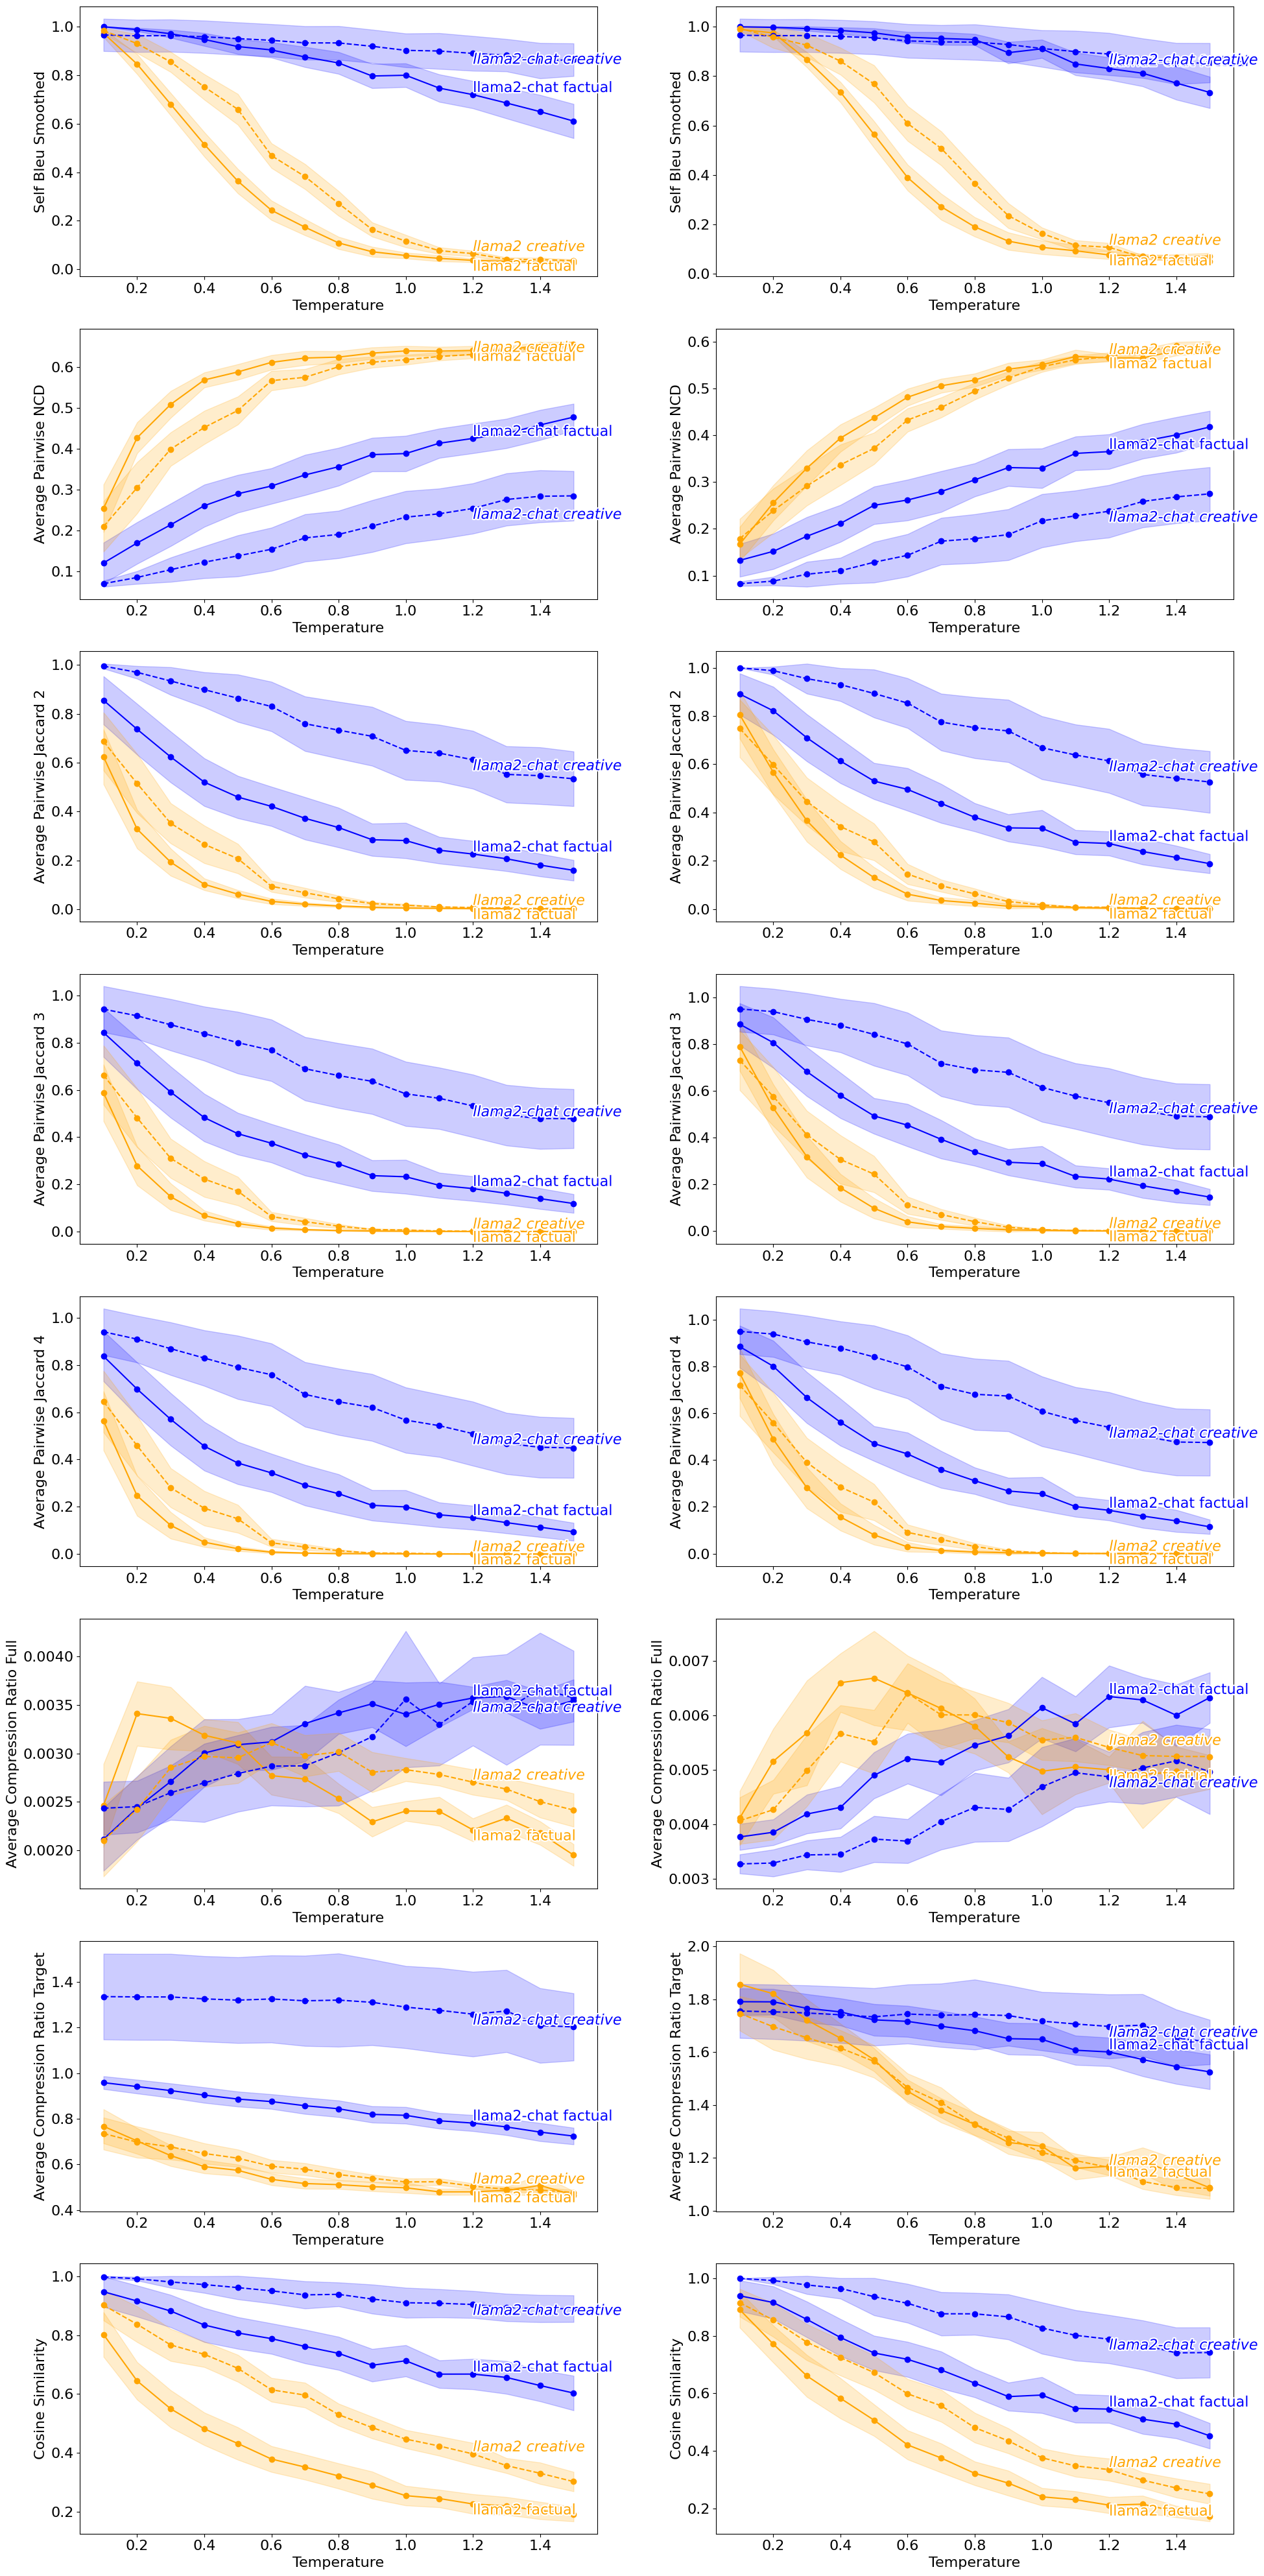

In [45]:
num_metrics = len(diversity_metrics.keys())
fig, axes = plt.subplots(num_metrics, 2, figsize=(20, 5*num_metrics))
# make font bigger
plt.rcParams.update({'font.size': 16})

text_effect = [path_effects.withStroke(linewidth=3, foreground='white')]

i=0
for index, metric in enumerate(diversity_metrics.keys()):

    for col_idx, result in enumerate([llama2_chat_results_20_words, llama2_chat_results_5_words]):
        ax = axes[index, col_idx]

        scores_factual = result["factual"][metric]
        scores_creative = result["creative"][metric]

        result_other = [llama2_results_20_words, llama2_results_5_words][col_idx]
        scores_factual_other = result_other["factual"][metric]
        scores_creative_other = result_other["creative"][metric]

        # Plotting for factual scores
        ax.plot(temperatures, scores_factual[:, :, 0].mean(axis=1), label='llama2-chat', marker='o', color="blue")
        ax.fill_between(temperatures, scores_factual[:, :, 0].mean(axis=1) - 2 * scores_factual[:, :, 0].std(axis=1) / np.sqrt(scores_factual.shape[1]), 
                        scores_factual[:, :, 0].mean(axis=1) + 2 * scores_factual[:, :, 0].std(axis=1) / np.sqrt(scores_factual.shape[1]), alpha=0.2, color="blue")

        ax.plot(temperatures, scores_factual_other[:, :, 0].mean(axis=1), label='llama2', marker='o', color="orange")
        ax.fill_between(temperatures, scores_factual_other[:, :, 0].mean(axis=1) - 2 * scores_factual_other[:, :, 0].std(axis=1) / np.sqrt(scores_factual_other.shape[1]), 
                        scores_factual_other[:, :, 0].mean(axis=1) + 2 * scores_factual_other[:, :, 0].std(axis=1) / np.sqrt(scores_factual_other.shape[1]), alpha=0.2, color="orange")

        # Plotting for creative scores
        ax.plot(temperatures, scores_creative[:, :, 0].mean(axis=1), label='llama2-chat creative', marker='o', linestyle='--', color="blue")
        ax.fill_between(temperatures, scores_creative[:, :, 0].mean(axis=1) - 2 * scores_creative[:, :, 0].std(axis=1) / np.sqrt(scores_creative.shape[1]), 
                        scores_creative[:, :, 0].mean(axis=1) + 2 * scores_creative[:, :, 0].std(axis=1) / np.sqrt(scores_creative.shape[1]), alpha=0.2, color="blue")

        ax.plot(temperatures, scores_creative_other[:, :, 0].mean(axis=1), label='llama2 creative', marker='o', linestyle='--', color="orange")
        ax.fill_between(temperatures, scores_creative_other[:, :, 0].mean(axis=1) - 2 * scores_creative_other[:, :, 0].std(axis=1) / np.sqrt(scores_creative_other.shape[1]), 
                        scores_creative_other[:, :, 0].mean(axis=1) + 2 * scores_creative_other[:, :, 0].std(axis=1) / np.sqrt(scores_creative_other.shape[1]), alpha=0.2, color="orange")

        ax.set_xlabel('Temperature')
        # ax.set_ylabel(metric)
        ax.set_ylabel(metric_name[i])
        # ax.set_title(f'Diversity metric: {metric} for {20 if col_idx == 0 else 5} max words')
        #ax.legend()
        text_effect = [path_effects.withStroke(linewidth=3, foreground='white')]

        # Add labels directly on the plot with white outline
        end_temp = temperatures[-4]
        text_factual1 = ax.text(end_temp, scores_factual[:, :, 0].mean(axis=1)[-4], 'llama2-chat factual', color='blue', verticalalignment='bottom')
        text_factual1.set_path_effects(text_effect)

        text_factual2 = ax.text(end_temp, scores_factual_other[:, :, 0].mean(axis=1)[-4], 'llama2 factual', color='orange', verticalalignment='top')
        text_factual2.set_path_effects(text_effect)

        text_creative1 = ax.text(end_temp, scores_creative[:, :, 0].mean(axis=1)[-4], 'llama2-chat creative', color='blue', verticalalignment='top', style='italic')
        text_creative1.set_path_effects(text_effect)

        text_creative2 = ax.text(end_temp, scores_creative_other[:, :, 0].mean(axis=1)[-4], 'llama2 creative', color='orange', verticalalignment='bottom', style='italic')
        text_creative2.set_path_effects(text_effect)
        i+=1


plt.tight_layout()
plt.show()

Pythia

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


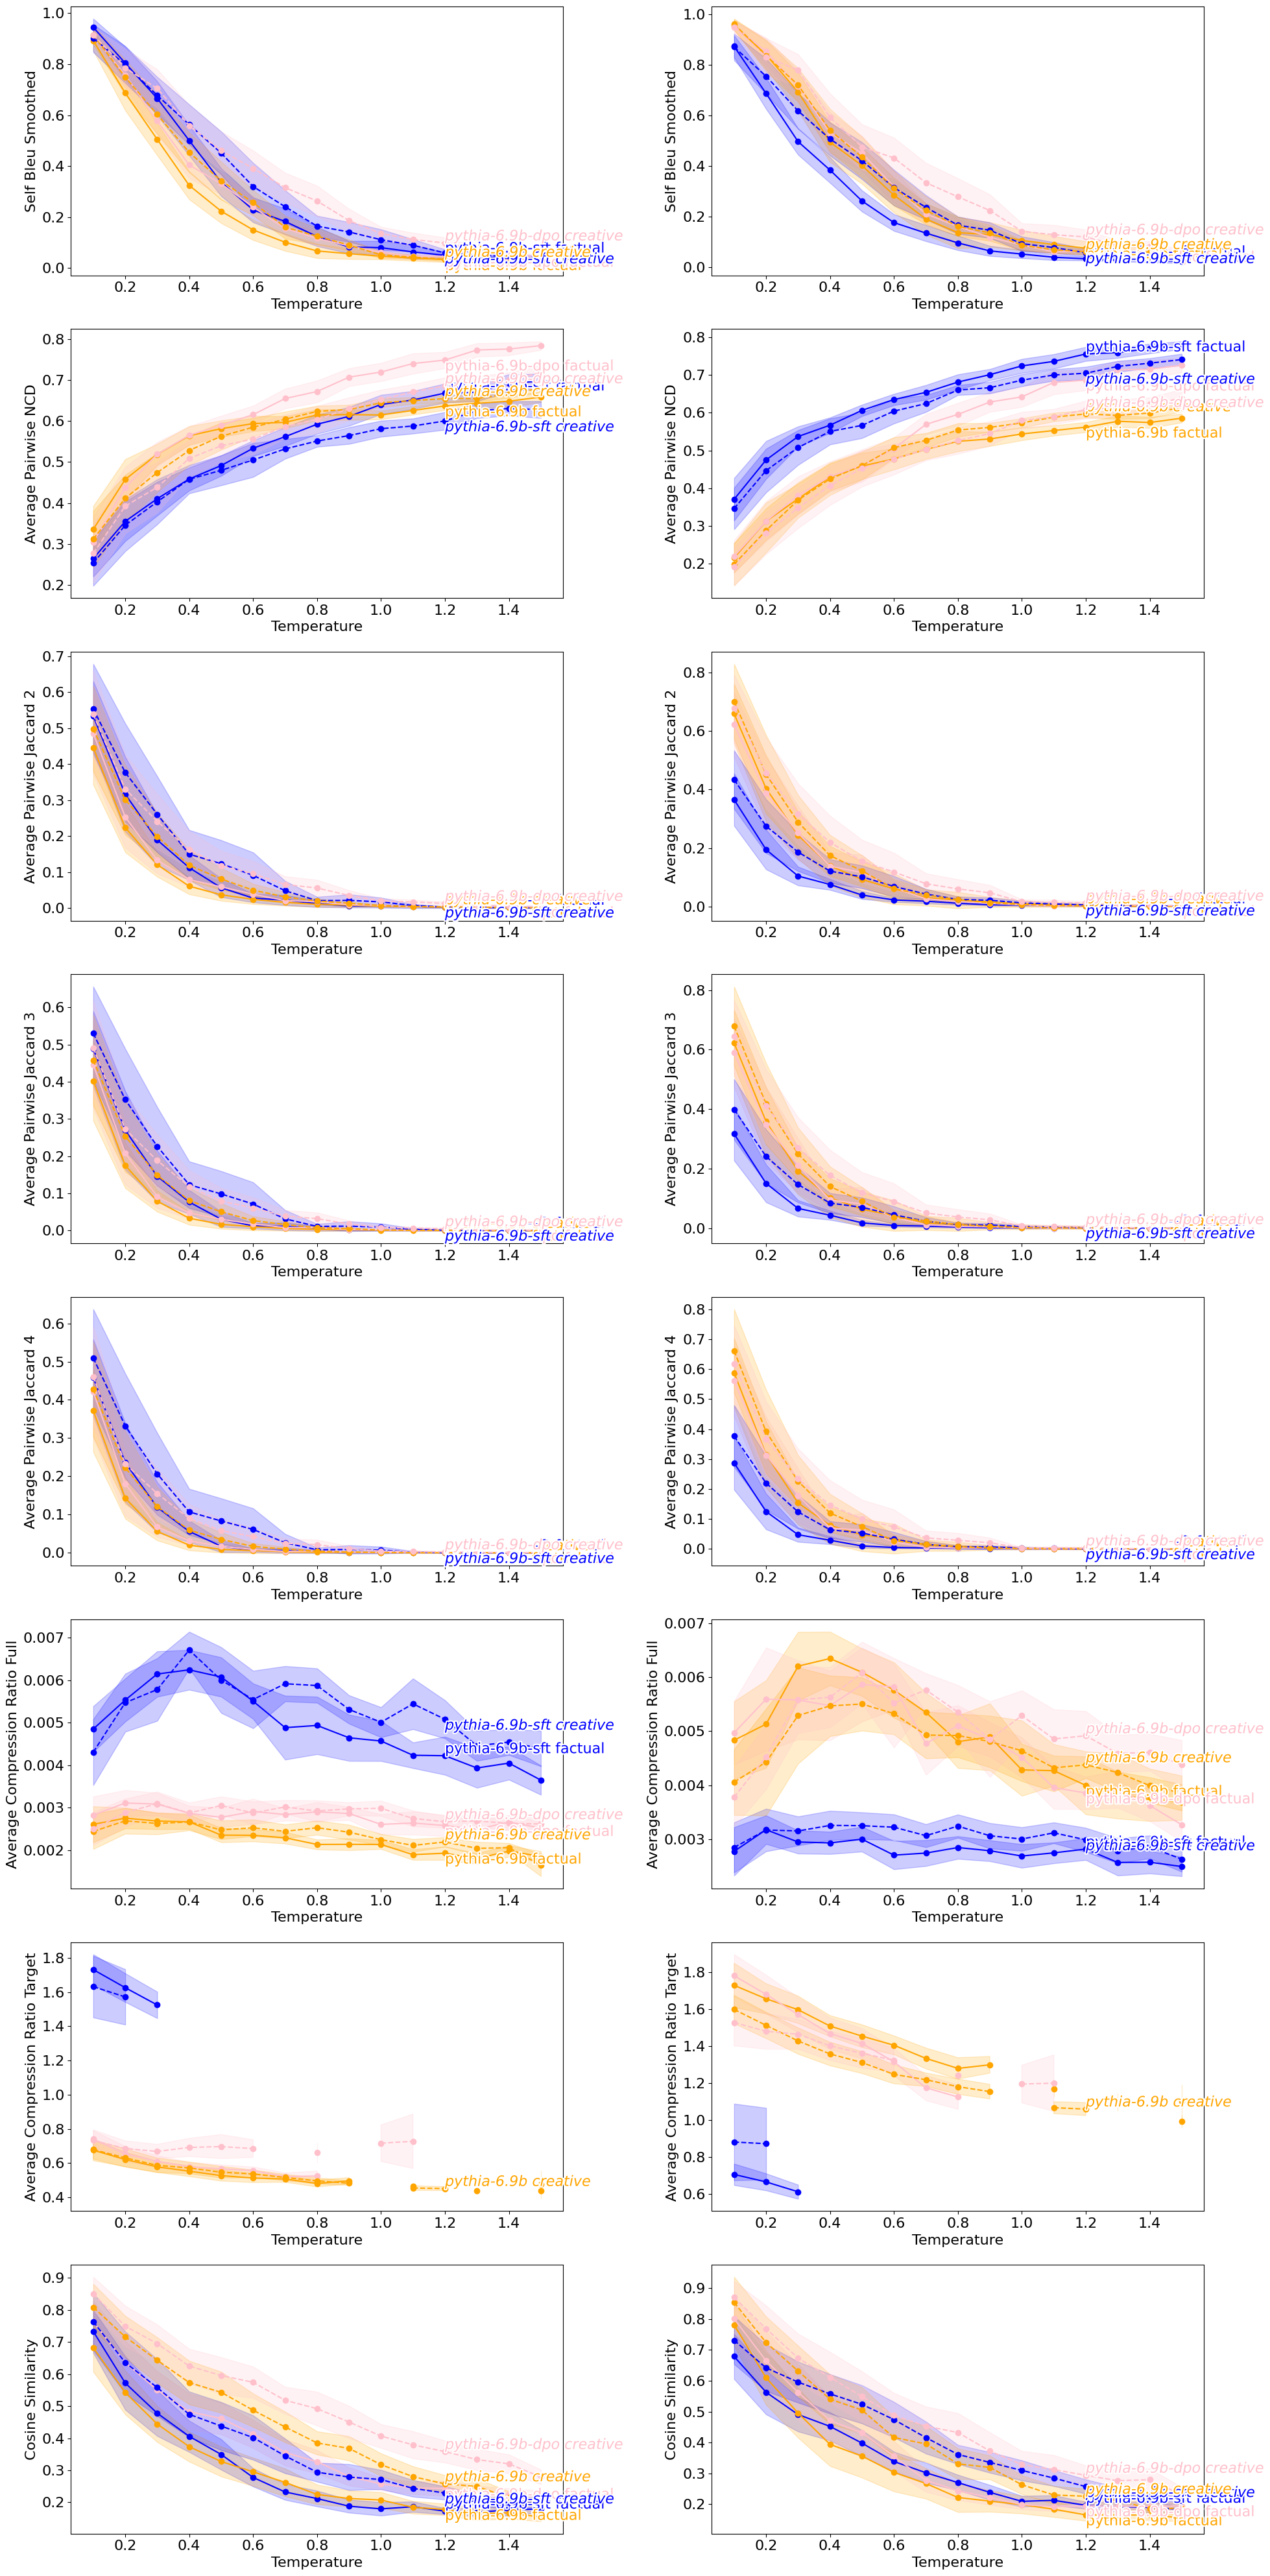

In [46]:
num_metrics = len(diversity_metrics.keys())
fig, axes = plt.subplots(num_metrics, 2, figsize=(20, 5*num_metrics))
# make font bigger
plt.rcParams.update({'font.size': 16})

text_effect = [path_effects.withStroke(linewidth=3, foreground='white')]

i=0
for index, metric in enumerate(diversity_metrics.keys()):

    for col_idx, result in enumerate([pythia_69b_sft_results_5_words, pythia_69b_sft_results_20_words]):
        ax = axes[index, col_idx]

        scores_factual = result["factual"][metric]
        scores_creative = result["creative"][metric]

        result_other = [pythia_69b_results_20_words, pythia_69b_results_5_words][col_idx]
        scores_factual_other = result_other["factual"][metric]
        scores_creative_other = result_other["creative"][metric]

        result_other_dpo = [pythia_69b_dpo_results_20_words, pythia_69b_dpo_results_5_words][col_idx]
        scores_factual_other_dpo = result_other_dpo["factual"][metric]
        scores_creative_other_dpo = result_other_dpo["creative"][metric]

        # Plotting for factual scores
        ax.plot(temperatures, scores_factual[:, :, 0].mean(axis=1), label='pythia-6.9b-sft factual', marker='o', color="blue")
        ax.fill_between(temperatures, scores_factual[:, :, 0].mean(axis=1) - 2 * scores_factual[:, :, 0].std(axis=1) / np.sqrt(scores_factual.shape[1]), 
                        scores_factual[:, :, 0].mean(axis=1) + 2 * scores_factual[:, :, 0].std(axis=1) / np.sqrt(scores_factual.shape[1]), alpha=0.2, color="blue")

        ax.plot(temperatures, scores_factual_other[:, :, 0].mean(axis=1), label='pythia6.9b factual', marker='o', color="orange")
        ax.fill_between(temperatures, scores_factual_other[:, :, 0].mean(axis=1) - 2 * scores_factual_other[:, :, 0].std(axis=1) / np.sqrt(scores_factual_other.shape[1]), 
                        scores_factual_other[:, :, 0].mean(axis=1) + 2 * scores_factual_other[:, :, 0].std(axis=1) / np.sqrt(scores_factual_other.shape[1]), alpha=0.2, color="orange")

        ax.plot(temperatures, scores_factual_other_dpo[:, :, 0].mean(axis=1), label='pythia6.9b-dpo factual', marker='o', color="pink")
        ax.fill_between(temperatures, scores_factual_other_dpo[:, :, 0].mean(axis=1) - 2 * scores_factual_other_dpo[:, :, 0].std(axis=1) / np.sqrt(scores_factual_other_dpo.shape[1]), 
                        scores_factual_other_dpo[:, :, 0].mean(axis=1) + 2 * scores_factual_other_dpo[:, :, 0].std(axis=1) / np.sqrt(scores_factual_other_dpo.shape[1]), alpha=0.2, color="pink")

        # Plotting for creative scores
        ax.plot(temperatures, scores_creative[:, :, 0].mean(axis=1), label='pythia-6.9b-sft creative', marker='o', linestyle='--', color="blue")
        ax.fill_between(temperatures, scores_creative[:, :, 0].mean(axis=1) - 2 * scores_creative[:, :, 0].std(axis=1) / np.sqrt(scores_creative.shape[1]), 
                        scores_creative[:, :, 0].mean(axis=1) + 2 * scores_creative[:, :, 0].std(axis=1) / np.sqrt(scores_creative.shape[1]), alpha=0.2, color="blue")

        ax.plot(temperatures, scores_creative_other[:, :, 0].mean(axis=1), label='pythia-6.9b creative', marker='o', linestyle='--', color="orange")
        ax.fill_between(temperatures, scores_creative_other[:, :, 0].mean(axis=1) - 2 * scores_creative_other[:, :, 0].std(axis=1) / np.sqrt(scores_creative_other.shape[1]), 
                        scores_creative_other[:, :, 0].mean(axis=1) + 2 * scores_creative_other[:, :, 0].std(axis=1) / np.sqrt(scores_creative_other.shape[1]), alpha=0.2, color="orange")

        ax.plot(temperatures, scores_creative_other_dpo[:, :, 0].mean(axis=1), label='pythia-6.9b-dpo creative', marker='o', linestyle='--', color="pink")
        ax.fill_between(temperatures, scores_creative_other_dpo[:, :, 0].mean(axis=1) - 2 * scores_creative_other_dpo[:, :, 0].std(axis=1) / np.sqrt(scores_creative_other_dpo.shape[1]), 
                        scores_creative_other_dpo[:, :, 0].mean(axis=1) + 2 * scores_creative_other_dpo[:, :, 0].std(axis=1) / np.sqrt(scores_creative_other_dpo.shape[1]), alpha=0.2, color="pink")

        ax.set_xlabel('Temperature')
        # ax.set_ylabel(metric)
        ax.set_ylabel(metric_name[i])
        # ax.set_title(f'Diversity metric: {metric} for {20 if col_idx == 0 else 5} max words')
        #ax.legend()
        text_effect = [path_effects.withStroke(linewidth=3, foreground='white')]

        # Add labels directly on the plot with white outline
        end_temp = temperatures[-4]
        text_factual1 = ax.text(end_temp, scores_factual[:, :, 0].mean(axis=1)[-4], 'pythia-6.9b-sft factual', color='blue', verticalalignment='bottom')
        text_factual1.set_path_effects(text_effect)

        text_factual2 = ax.text(end_temp, scores_factual_other[:, :, 0].mean(axis=1)[-4], 'pythia-6.9b factual', color='orange', verticalalignment='top')
        text_factual2.set_path_effects(text_effect)

        text_factual3 = ax.text(end_temp, scores_factual_other_dpo[:, :, 0].mean(axis=1)[-4], 'pythia-6.9b-dpo factual', color='pink', verticalalignment='top')
        text_factual3.set_path_effects(text_effect)

        text_creative1 = ax.text(end_temp, scores_creative[:, :, 0].mean(axis=1)[-4], 'pythia-6.9b-sft creative', color='blue', verticalalignment='top', style='italic')
        text_creative1.set_path_effects(text_effect)

        text_creative2 = ax.text(end_temp, scores_creative_other[:, :, 0].mean(axis=1)[-4], 'pythia-6.9b creative', color='orange', verticalalignment='bottom', style='italic')
        text_creative2.set_path_effects(text_effect)
        
        text_creative3 = ax.text(end_temp, scores_creative_other_dpo[:, :, 0].mean(axis=1)[-4], 'pythia-6.9b-dpo creative', color='pink', verticalalignment='bottom', style='italic')
        text_creative3.set_path_effects(text_effect)
        i+=1


plt.tight_layout()
plt.show()

## How does the difference in diversity between creative and factual changes with temperature?

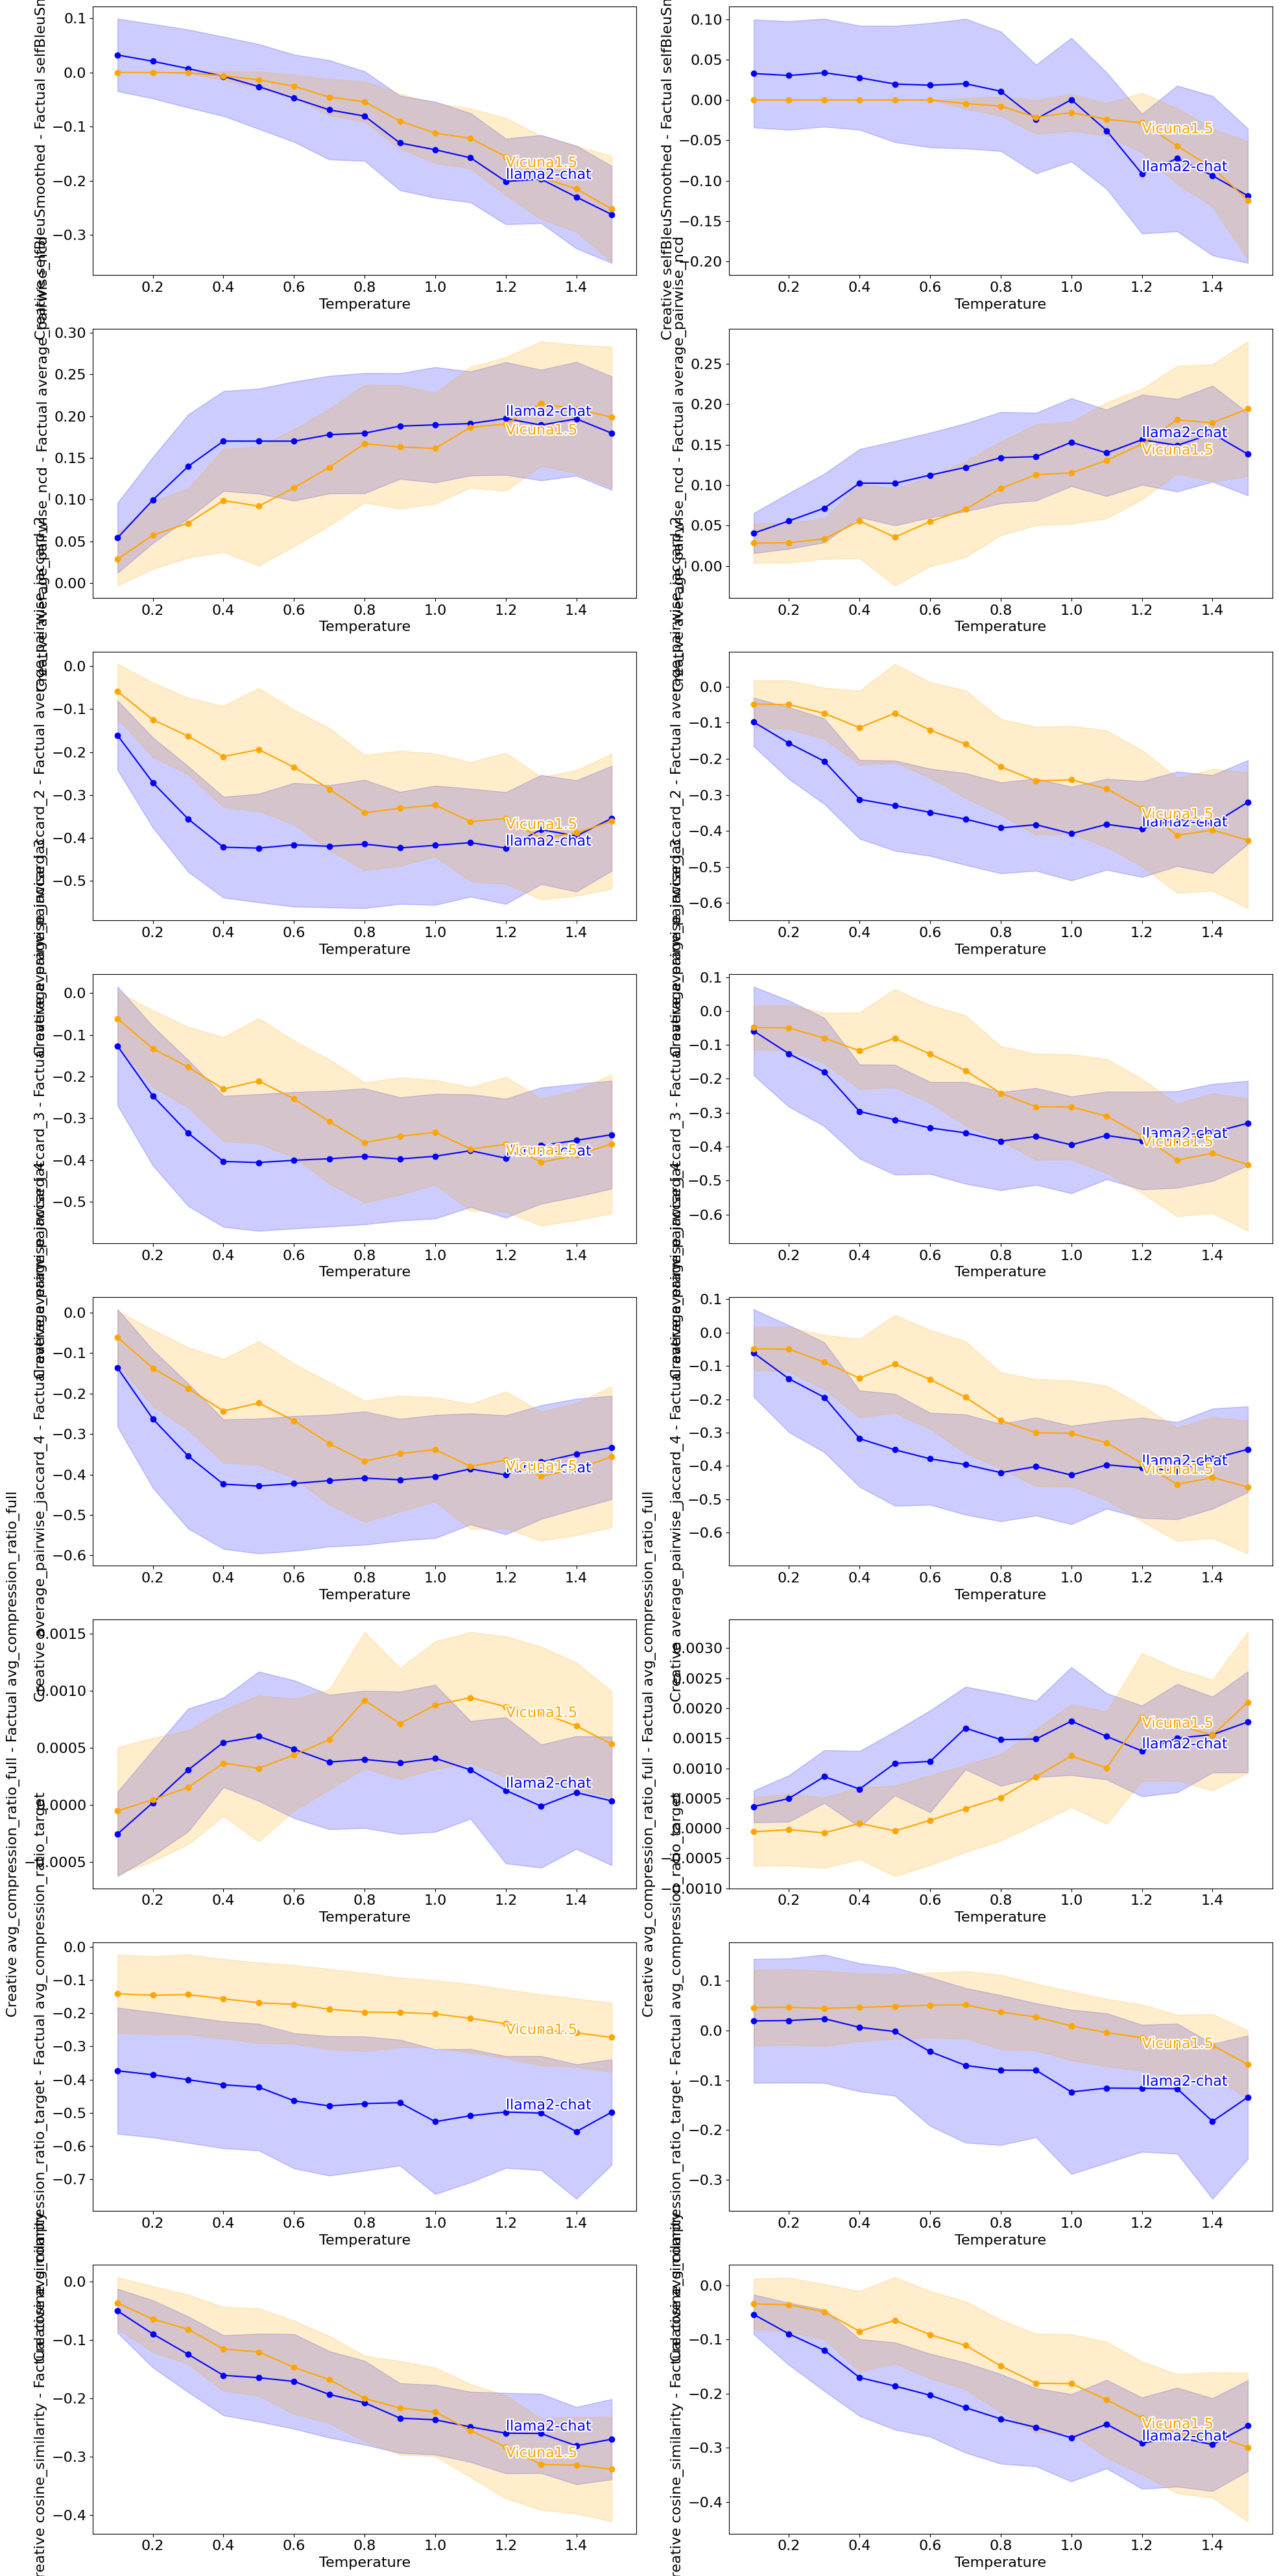

In [12]:
num_metrics = len(diversity_metrics.keys())
fig, axes = plt.subplots(num_metrics, 2, figsize=(20, 5*num_metrics))
# make font bigger
plt.rcParams.update({'font.size': 16})
text_effect = [path_effects.withStroke(linewidth=3, foreground='white')]

i=0
for index, metric in enumerate(diversity_metrics.keys()):

    for col_idx, result in enumerate([results_20_words, results_5_words]):
        ax = axes[index, col_idx]

        scores_factual = result["factual"][metric]
        scores_creative = result["creative"][metric]

        # Calculate differences
        diff_llamaa = scores_creative[:, :, 0] - scores_factual[:, :, 0]
        diff_vicuna = scores_creative[:, :, 1] - scores_factual[:, :, 1]

        # Plotting differences
        ax.plot(temperatures, diff_llamaa.mean(axis=1), label='llama2-chat', marker='o', color="blue")
        ax.fill_between(temperatures, diff_llamaa.mean(axis=1) - 2 * diff_llamaa.std(axis=1) / np.sqrt(diff_llamaa.shape[1]), 
                        diff_llamaa.mean(axis=1) + 2 * diff_llamaa.std(axis=1) / np.sqrt(diff_llamaa.shape[1]), alpha=0.2, color="blue")

        ax.plot(temperatures, diff_vicuna.mean(axis=1), label='Vicuna1.5', marker='o', color="orange")
        ax.fill_between(temperatures, diff_vicuna.mean(axis=1) - 2 * diff_vicuna.std(axis=1) / np.sqrt(diff_vicuna.shape[1]), 
                        diff_vicuna.mean(axis=1) + 2 * diff_vicuna.std(axis=1) / np.sqrt(diff_vicuna.shape[1]), alpha=0.2, color="orange")

        end_temp = temperatures[-4]
        text_llama = ax.text(end_temp, diff_llamaa.mean(axis=1)[-4], 'llama2-chat', color='blue', verticalalignment='bottom')
        text_llama.set_path_effects(text_effect)

        text_vicuna = ax.text(end_temp, diff_vicuna.mean(axis=1)[-4], 'Vicuna1.5', color='orange', verticalalignment='top')
        text_vicuna.set_path_effects(text_effect)

        # ax.set_title(f"Metric: {metric} for Result {20 if col_idx == 0 else 5} max words")
        ax.set_xlabel("Temperature")
        ax.set_ylabel(f"Creative {metric} - Factual {metric}")
        i+=1

plt.tight_layout()
plt.show()